In [94]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cmc_common_list = [['snow-covered plains', 'island', 'snow-covered forest', 'snow-covered swamp', 'sulfurous mire', 'volatile fjord', 'ice tunnel', 'snow-covered island', 'alpine meadow', 'shimmerdrift vale', 'glacial floodplain', 'rimewood falls', 'snowfield sinkhole', 'snow-covered mountain', 'highland forest', 'mountain', 'arctic treeline', 'swamp', 'plains', 'forest', 'woodland chasm'], ['jaspera sentinel', 'wings of the cosmos', 'brinebarrow intruder', 'weigh down', 'duskwielder', 'codespell cleric', 'snakeskin veil', 'bind the monster', 'valor of the worthy', 'village rites', "tormentor's helm", 'annul', 'battlefield raptor', 'fearless pup', 'frost bite'], ['roots of wisdom', 'arachnoform', 'deathknell berserker', 'guardian gladewalker', 'beskir shieldmate', 'strategic planning', 'demonic gifts', 'withercrown', 'elderfang disciple', 'vault robber', 'run amok', 'mists of littjara', 'story seeker', 'axgard cavalry', 'pilfering hawk', 'depart the realm', 'raise the draugr', 'sculptor of winter', 'immersturm raider', 'raven wings', 'funeral longboat', 'revitalize', 'goldvein pick', 'priest of the haunted edge', 'masked vandal', 'giant ox', 'karfell harbinger', 'disdainful stroke'], ['infernal pet', 'invoke the divine', 'ravenform', 'tuskeri firewalker', 'glittering frost', 'open the omenpaths', 'seize the spoils', 'goldmaw champion', "raiders' karve", 'broken wings', 'horizon seeker', 'bound in gold', "koma's faithful", 'doomskar oracle', 'gnottvold recluse', 'shackles of treachery', "king harald's revenge", 'starnheim courser', 'scorn effigy', 'draugr thought-thief', 'mammoth growth', 'mistwalker', 'iron verdict', 'demon bolt', 'grim draugr', 'breakneck berserker', 'icehide troll'], ['axgard braggart', 'craven hulk', 'stalwart valkyrie', 'behold the multiverse', 'jarl of the forsaken', 'struggle for skemfar', 'littjara kinseekers', 'smashing success', 'frostpeak yeti', 'feed the serpent', 'dogged pursuit', 'skull raid', 'elderleaf mentor', 'dwarven reinforcements', 'draugr recruiter', "sarulf's packmate", 'augury raven'], ['karfell kennel-master', 'master skald', 'warhorn blast', 'squash', 'berg strider', 'hagi mob', 'grizzled outrider'], ['undersea invader', 'dread rider', 'run ashore', "gods' hall guardian", 'ravenous lindwurm'], ['cinderheart giant']]

In [106]:
BATCH_SIZE = 2000
CHUNKSIZE = BATCH_SIZE
def getDataIter():
    dataiter = pd.read_csv('game_data_public.KHM.PremierDraft.csv',chunksize=CHUNKSIZE)
    return dataiter

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

<AxesSubplot:xlabel='num_turns'>

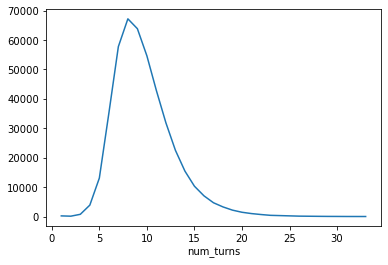

In [14]:
def group_num_turns(df):
    df["num_games"] = 1
    df = df.groupby(by="num_turns").sum()
    df = df["num_games"]
    return df

turn_count_iter = getDataIter()
turn_count = next(turn_count_iter)
turn_count = group_num_turns(turn_count)
counter = 0
for batch in turn_count_iter:
    print(counter,end=" ")
    batch = group_num_turns(batch)
    turn_count = turn_count.add(batch,fill_value=0)
    counter += 1
turn_count.plot()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

<AxesSubplot:xlabel='drawn'>

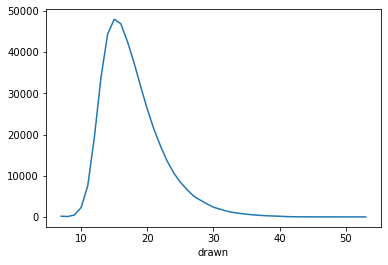

In [26]:
def group_card_count(df):
    df["drawn"] = df.loc[:,df.columns.str.contains("drawn")].sum(axis=1)
    df["drawn"] += df.loc[:,df.columns.str.contains("opening")].sum(axis=1)
    df["num_games"] = 1
    df = df.groupby(by="drawn").sum()
    df = df["num_games"]
    return df

card_count_iter = getDataIter()
card_count = next(card_count_iter)
card_count = group_card_count(card_count)
counter = 0
for batch in card_count_iter:
    print(counter, end=" ")
    batch = group_card_count(batch)
    card_count = card_count.add(batch,fill_value=0)
    counter += 1
card_count.plot()

In [72]:
data = next(getDataIter())
#data.columns = [column.lower() for column in data.columns]
for column in data.columns:
    print(column)
cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
drawn = data[map(lambda x : "drawn_"+x,cards)]
open = data[map(lambda x : "opening_hand_"+x,cards)]
print(drawn.shape, open.shape, (drawn+open).shape)

user_win_rate_bucket
user_n_games_bucket
draft_id
build_index
draft_time
expansion
event_type
game_number
rank
on_play
num_mulligans
opp_num_mulligans
opp_colors
num_turns
won
opening_hand_Absorb Identity
opening_hand_Aegar, the Freezing Flame
opening_hand_Alpine Meadow
opening_hand_Alrund's Epiphany
opening_hand_Alrund, God of the Cosmos
opening_hand_Annul
opening_hand_Arachnoform
opening_hand_Arctic Treeline
opening_hand_Armed and Armored
opening_hand_Arni Brokenbrow
opening_hand_Arni Slays the Troll
opening_hand_Ascendant Spirit
opening_hand_Ascent of the Worthy
opening_hand_Augury Raven
opening_hand_Avalanche Caller
opening_hand_Axgard Armory
opening_hand_Axgard Braggart
opening_hand_Axgard Cavalry
opening_hand_Barkchannel Pathway
opening_hand_Basalt Ravager
opening_hand_Battershield Warrior
opening_hand_Battle Mammoth
opening_hand_Battle for Bretagard
opening_hand_Battle of Frost and Fire
opening_hand_Battlefield Raptor
opening_hand_Bearded Axe
opening_hand_Behold the Multiverse
o

sideboard_Sword of the Realms
sideboard_Tergrid's Lantern
sideboard_Tergrid's Shadow
sideboard_Tergrid, God of Fright
sideboard_The Bears of Littjara
sideboard_The Bloodsky Massacre
sideboard_The Omenkeel
sideboard_The Prismatic Bridge
sideboard_The Raven's Warning
sideboard_The Ringhart Crest
sideboard_The Three Seasons
sideboard_The Trickster-God's Heist
sideboard_The World Tree
sideboard_Thornmantle Striker
sideboard_Throne of Death
sideboard_Tibalt's Trickery
sideboard_Tibalt, Cosmic Impostor
sideboard_Tidechannel Pathway
sideboard_Toralf's Hammer
sideboard_Toralf, God of Fury
sideboard_Tormentor's Helm
sideboard_Toski, Bearer of Secrets
sideboard_Tundra Fumarole
sideboard_Tuskeri Firewalker
sideboard_Tyrite Sanctum
sideboard_Tyvar Kell
sideboard_Undersea Invader
sideboard_Usher of the Fallen
sideboard_Valki, God of Lies
sideboard_Valkmira, Protector's Shield
sideboard_Valkyrie Harbinger
sideboard_Valkyrie's Sword
sideboard_Valor of the Worthy
sideboard_Varragoth, Bloodsky Sire
sid

In [ ]:
def add_turn_weight_cols(data):
    data["turn_weight"] = data["num_turns"].apply(lambda x : turn_count_prob[x])
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    turn_col = ["turn_weight_" + col for col in cards]
    data[turn_col] = \
        data[map(lambda x : "drawn_"+x,cards)].to_numpy() \
        + data[map(lambda x : "opening_hand_"+x,cards)].to_numpy()
    data[turn_col] = data[turn_col] > 0
    data[turn_col] = data[turn_col].mul(data["turn_weight"], axis=0)
    turn_won_col = ["turn_weight_won_" + col for col in opening]
    data[turn_won_col] = data[turn_col].mul(data["won"],axis=0)
    return data
    
def add_cards_drawn_weight_cols(data):
    data["drawn_weight"] = data.loc[:,data.columns.str.contains("drawn")].sum(axis=1)
    data["drawn_weight"] += data.loc[:,data.columns.str.contains("opening")].sum(axis=1)
    data["drawn_weight"] = data["drawn_weight"].apply(lambda x : card_count_prob[x])
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    in_hand_col = ["in_hand_weight_" + col for col in cards]
    data[in_hand_col] = \
        data[map(lambda x : "drawn_"+x,cards)].to_numpy() \
        + data[map(lambda x : "opening_hand_"+x,cards)].to_numpy()
    data[in_hand_col] = data[in_hand_col] > 0
    data[in_hand_col] = data[in_hand_col].mul(data["drawn_weight"], axis=0)
    in_hand_won_col = ["in_hand_weight_won_" + col for col in opening]
    data[in_hand_won_col] = data[in_hand_col].mul(data["won"],axis=0)
    return data

def add_idw(data):
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    idw_col = ["idw_won_" + col for col in cards]
    data[idw_col] = data.loc[:,data.columns.str.contains("deck")].mul(data["won"],axis=0)
    return data

def add_other_metrics(data):
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    opening = ["ohw_" + col for col in cards]
    data[opening] = data.loc[:,data.columns.str.contains("opening_hand")].mul(data["won"],axis=0)
    drawn = ["dw_" + col for col in cards]
    data[drawn] = data.loc[:,data.columns.str.contains("drawn_")].mul(data["won"],axis=0)
    return data


def add_cols(data):
    data = add_turn_weight_cols(data)
    data = add_cards_drawn_weight_cols(data)
    data = add_other_metrics(data)
    data = add_in_hand_won(data)
    return data
    
card_count_prob = card_count/sum(card_count)
turn_count_prob = turn_count/sum(turn_count)
data_iter = getDataIter()
data = next(data_iter)
data = add_cols(data)
data = data.sum()
counter = 0
for chunk in data_iter:
    print(counter,end=" ")
    chunk = add_cols(chunk)
    data += chunk.sum()
    counter += 1
data